# Práctica 12: Diferenciación e integración numéricas con MATLAB®

En ingeniería, es muy común usar el término derivada en diversos cursos como cálculo diferencial e integral, modelado de sistemas dinámicos, análisis de señales y control clásico entre otros. El concepto de derivada es de gran utilidad devido a que proporciona una medición de la razón de cambio de una variable respecto de los cambios que presenta una segunda variable de interés o bajo análisis. La derivada de una función $y=f(x)$ se denomina también como la razón de cambion entre la variable $y$ y la variable $x$. La derivada de una función se puede obtener usando la herramienta de cómputo simbólico disponible en MATLAB®, por ejemplo, la derivada de la función: $y=2x^3-4x^2+3$, definida como:

$$
\frac{dy}{dx}=y'=\dot{y}=6x^2-8x
$$

Se puede resolver la derivada de la función $y$ respecto de $x$ usando la herramienta de cómputo simbólico de MATLAB®, con las siguientes instrucciones:

In [1]:
clear
close all
clc

syms y(x) x; % Creación de variables simbólicas

y(x) = 2*x^3-4*x^2+3; % Se especifica la función a diferenciar
Derivada = diff(y,x)



## Diferenciación numérica

Como se trató en la práctica pasada, existen muchos casos en la ingeniería donde no se cuenta con una función en específico o forma cerrada, sino que se cuenta con un conjunto de datos experimentales en forma de pares ordenados, de manera que la derivada se calcula de forma numérica ({cite:t}`Moore2013`):

$$
\frac{dy}{dx}=\frac{\Delta y}{\Delta x}=\frac{y_2-y_1}{x_2-x_1}
$$

Considere los pares ordenados de la práctica anterior y mostrados en la siguiente tabla:


  |   $x$   |   $y$   |  
  | :------ | ------: | 
  |  0.0  |  22.430 | 
  |  1.0  |  19.398 | 
  |  2.0  |  11.341 |  
  |  3.0  |  8.422 |  
  |  4.0  |  5.215 |  
  |  5.0  |  0.434 |  

 Si se usa la función `diff()` para aplicarla a los datos reportados en las columnas de la tabla anterior, se encontrará la pendiente de la recta que une cada par de datos consecutivos:


In [2]:
clear 
close all
clc

x=[0:5]; %vector x original
y=[22.430,19.398,11.342,8.422,5.215,0.434]; % vector y original

delta_x=diff(x)

delta_x = 1×5 double
     1     1     1     1     1

El resultado anterior refleja el hecho de que los datos en el vector $x$ están espaciados de manera uniforme. Ahora bien si se diferencian los datos contenidos en la columna $y$ se obtiene:

In [3]:
delta_y=diff(y)

delta_y = 1×5 double
   -3.0320   -8.0560   -2.9200   -3.2070   -4.7810

Para encontrar las pendientes de las rectas que unen a cada par de puntos se establece el cociente $\frac{\Delta y}{\Delta x}$ de la siguiente manera:

In [4]:
pendientes=delta_y./delta_x

pendientes = 1×5 double
   -3.0320   -8.0560   -2.9200   -3.2070   -4.7810

El arreglo o vector pendientes tiene un elemento menos que los datos originales de las columnas $x$ e $y$, debido a que se calculan diferencias entre los elementos de los arreglos originales. La siguiente figura ilustra gráficamente lo anteriormente expuesto: 

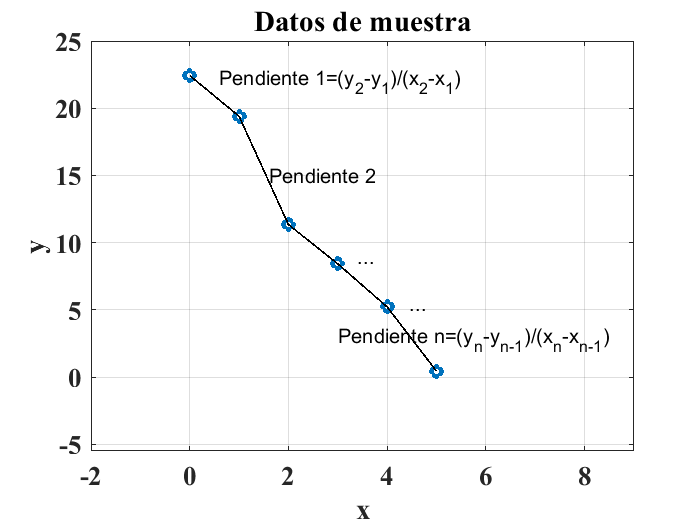

In [5]:
close all
figure
plot(x,y,"o","LineWidth",3)
axis([-2,9,-5.5,25])
hold on
plot(x,y,"k-","LineWidth",1)
title("Datos de muestra")

txt ="Pendiente 1=(y_2-y_1)/(x_2-x_1)";
text(0.6,22,txt,'FontSize',12)

txt ="Pendiente 2";
text(1.6,15,txt,'FontSize',12)

txt ="                                            ...";
text(-1.55,9,txt,'FontSize',12)

txt ="                                            ...";
text(-0.5,5.5,txt,'FontSize',12)

txt ="Pendiente n=(y_n-y_{n-1})/(x_n-x_{n-1})";
text(3,2.8,txt,'FontSize',12)


grid
xlabel("x")
ylabel("y")
set(gca,'fontsize',16);
set(gca,'fontname','Times New Roman','FontWeight','Bold');

En el caso de que se conozca en forma cerrada la expresión o fórmula que relaciona los pares de datos, se puede usar la función de MATLAB® `diff()` para hacer una aproximación numérica de la derivada. Por ejemplo, para la función:

$$
y=2x^3-4x^2+3
$$

se obtiene gráficamente lo siguiente:

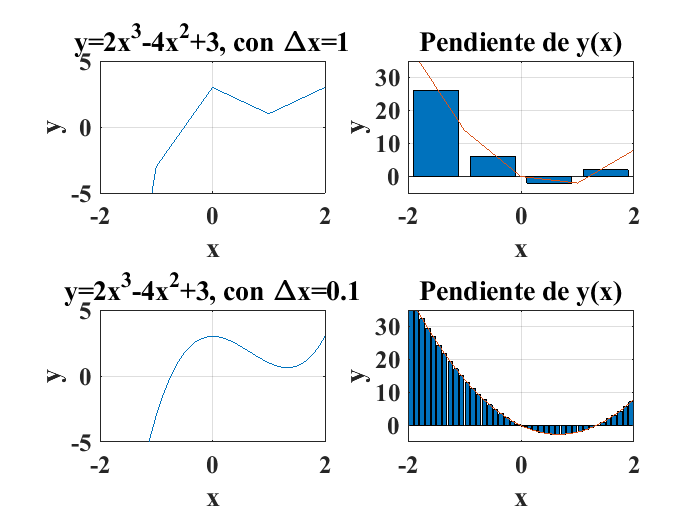

In [6]:
clear 
clc
close all 

x=[-2:1:2];
y=2*x.^3-4*x.^2+3;


figure
subplot(2,2,1)
plot(x,y)
title("y=2x^3-4x^2+3, con \Deltax=1")
axis([-2,2,-5,5])
xlabel("x")
ylabel("y")
grid
set(gca,'fontsize',15);
set(gca,'fontname','Times New Roman','FontWeight','Bold');

pendientes=diff(y)./diff(x);

subplot(2,2,2)
bar(x(1:max(size(x))-1)+diff(x)./2,pendientes)
axis([-2,2,-5,35])
title("Pendiente de y(x)")
hold on
plot(x,6*x.^2-8*x)
xlabel("x")
ylabel("y")
grid
set(gca,'fontsize',15);
set(gca,'fontname','Times New Roman','FontWeight','Bold');

x2=-2:0.1:2;
pendientes=diff(2*x2.^3-4*x2.^2+3)./diff(x2);


subplot(2,2,4)
bar(x2(1:max(size(x2))-1)+diff(x2)./2,pendientes)
title("Pendiente de y(x)")
axis([-2,2,-5,35])
hold on
plot(x2,6*x2.^2-8*x2)
xlabel("x")
ylabel("y")
grid
set(gca,'fontsize',15);
set(gca,'fontname','Times New Roman','FontWeight','Bold');

subplot(2,2,3)
plot(x2,2*x2.^3-4*x2.^2+3)
axis([-2,2,-5,5])
title("y=2x^3-4x^2+3, con \Deltax=0.1")
xlabel("x")
ylabel("y")
grid
set(gca,'fontsize',15);
set(gca,'fontname','Times New Roman','FontWeight','Bold');


Las gráficas anteriores muestran el cálculo de la derivada de la función $y=2x^3-4x^2+3$ en forma de gráficas de barras con diferente resolución en los datos. Las siguientes líneas de código ilustran el cálculo numérico de la derivada de la función antes mencionada con las dos resoluciones que se muestran en la figura anterior:

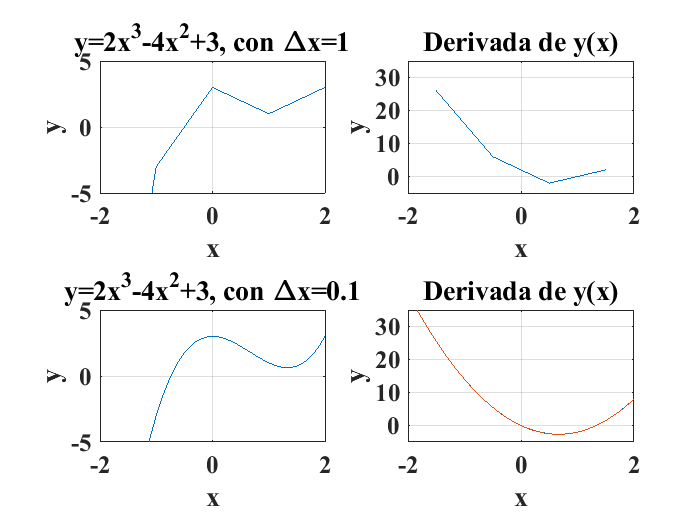

In [7]:
clear 
clc
close all 

x=[-2:1:2];
y=2*x.^3-4*x.^2+3;


figure
subplot(2,2,1)
plot(x,y)
title("y=2x^3-4x^2+3, con \Deltax=1")
axis([-2,2,-5,5])
xlabel("x")
ylabel("y")
grid
set(gca,'fontsize',15);
set(gca,'fontname','Times New Roman','FontWeight','Bold');

pendientes=diff(y)./diff(x);

subplot(2,2,2)
plot(x(1:max(size(x))-1)+diff(x)./2,pendientes)
axis([-2,2,-5,35])
title("Derivada de y(x)")
xlabel("x")
ylabel("y")
grid
set(gca,'fontsize',15);
set(gca,'fontname','Times New Roman','FontWeight','Bold');

x2=-2:0.1:2;
pendientes=diff(2*x2.^3-4*x2.^2+3)./diff(x2);


subplot(2,2,4)
plot(x2(1:max(size(x2))-1)+diff(x2)./2,pendientes)
title("Derivada de y(x)")
axis([-2,2,-5,35])
hold on
plot(x2,6*x2.^2-8*x2)
xlabel("x")
ylabel("y")
grid
set(gca,'fontsize',15);
set(gca,'fontname','Times New Roman','FontWeight','Bold');

subplot(2,2,3)
plot(x2,2*x2.^3-4*x2.^2+3)
axis([-2,2,-5,5])
title("y=2x^3-4x^2+3, con \Deltax=0.1")
xlabel("x")
ylabel("y")
grid
set(gca,'fontsize',15);
set(gca,'fontname','Times New Roman','FontWeight','Bold');


### Diferencias divididas finitas

En el caso de necesitar evaluar la derivada de un punto en específico en vez de la derivada numérica de un conjunto de pares ordenados experimentales, en forma de una curva, como en el caso anterior, se utiliza la pendiente de la recta que une dos puntos de interés, de manera que la derivada se aproxima de forma numérica como ({cite:t}`Moore2013`):

$$
\left ( \frac{dy}{dx} \right ) _{i}=\frac{y_{i+1}-y_i}{x_{i+1}-x_i}
$$

En este caso, es tambien completamente compatible la instrucción `diff()`. de manera que se asigna el resultado como la derivada evaluada en el primer punto en el rango. Dado que se utiliza un dato hacia adelante del conjunto, esta técnica de diferenciación se conoce como el método de diferencias finitas hacia adelante. 

EL siguiente ejemplo permite ilustrar el método de las diferencias divididas finitas hacia adelante:

Por ejemplo, para la función $y=2x^3$ se sabe que su derivada es:

$$
\frac{dy}{dx}=6x^2
$$

de manera que un programa para calcular la derivada de 10 puntos de esta función es el siguiente:

In [8]:
clear 
close all
clc

% Programa para el cálculo de la derivada de y=3x^2 en 10 puntos 
x=-2:1:2;
y=2*x.^3;
derivada=6*x.^2; % derivada analítica
dif_finitas=diff(y)./diff(x); % Diferencias divididas finitas
dif_finitas(length(x))=NaN; % Se ajusta el tamaño del arreglo para 
%establecer compatibilidad
%cálculo del porcentaje de error
error=((derivada-dif_finitas)./derivada)*100;
%construcción de una tabla 
titulo=["x","2*x.^3","Diferencias hacia adelante","error %"];
disp(table(x',derivada',dif_finitas',error','VariableNames',titulo))

    x     2*x.^3    Diferencias hacia adelante    error %
    __    ______    __________________________    _______

    -2      24                  14                 41.667
    -1       6                   2                 66.667
     0       0                   2                   -Inf
     1       6                  14                -133.33
     2      24                 NaN                    NaN



Como puede observarse, el error en la aproximación es muy grande. Esto se debe a la resolución o número de puntos utilizados para generar la función y los cálculos, si se utiliza una resolución mayor, es decir si se reduce el tamaño del incremento del vector $x$ se obtiene una mejor aproximación:

In [9]:
clear 
close all
clc

% Programa para el cálculo de la derivada de y=3x^2 en 10 puntos 
x=-2:0.1:2;
y=2*x.^3;
derivada=6*x.^2; % derivada analítica
dif_finitas=diff(y)./diff(x); % Diferencias divididas finitas
dif_finitas(length(x))=NaN; % Se ajusta el tamaño del arreglo para 
%establecer compatibilidad de manera que al establecer el último elemento
% se indica que serán diferencias hacia adelante
%cálculo del porcentaje de error
error=((derivada-dif_finitas)./derivada)*100;
%construcción de una tabla 
titulo=["x","2*x.^3","Diferencias hacia adelante","error %"];
disp(table(x(1:5)',derivada(1:5)',dif_finitas(1:5)',error(1:5)','VariableNames',titulo))

     x      2*x.^3    Diferencias hacia adelante    error %
    ____    ______    __________________________    _______

      -2       24               22.82               4.9167 
    -1.9    21.66               20.54               5.1708 
    -1.8    19.44               18.38               5.4527 
    -1.7    17.34               16.34                5.767 
    -1.6    15.36               14.42               6.1198 



### Diferencias divididas finitas hacia atrás

El cálculo de las diferencias finitas hacia atrás es similar al caso anterior con la diferencia de que el planteamiento es el siguiente:

$$
\left ( \frac{dy}{dx} \right ) _{i}=\frac{y_i-y_{i-1}}{x_i-x_{i-1}}
$$

En este caso se utiliza la misma función `diff()` pero en este caso se establece el valor `NaN` al primer valor del arreglo en vez de el último.


In [10]:
clear 
close all
clc

% Programa para el cálculo de la derivada de y=3x^2 en 10 puntos 
x=-2:0.1:2;
y=2*x.^3;
derivada=6*x.^2; % derivada analítica
diff_finitas=diff(y)./diff(x); % Diferencias divididas finitas
dif_finitas=[NaN,diff_finitas]; % Se ajusta el tamaño del arreglo para 
%establecer compatibilidad de manera que al establecer el primer elemento
% se indica que serán diferencias hacia atrás
%cálculo del porcentaje de error
error=((derivada-dif_finitas)./derivada)*100;
%construcción de una tabla 
titulo=["x","2*x.^3","Diferencias hacia adelante","error %"];
disp(table(x(1:5)',derivada(1:5)',dif_finitas(1:5)',error(1:5)','VariableNames',titulo))

     x      2*x.^3    Diferencias hacia adelante    error %
    ____    ______    __________________________    _______

      -2       24                 NaN                   NaN
    -1.9    21.66               22.82               -5.3555
    -1.8    19.44               20.54               -5.6584
    -1.7    17.34               18.38               -5.9977
    -1.6    15.36               16.34               -6.3802



Se observa en este caso que el error es negativo, debido a la dirección en la que se toman las diferencias divididas finitas.

### Diferencias divididas centrales

El cálculo de la derivada en los puntos de interés usando diferencias divididas finitas centradas es similar a los métodos antes expuestos con la diferencia principal de tomar en cuenta a los puntos siguiente y anterior del punto de interés:

$$
\left ( \frac{dy}{dx} \right ) _{i}=\frac{y_{i+1}-y_{i-1}}{x_{i+1}-x_{i-1}}
$$

Una desventaja de este método es que no se toman en cuenta el primer y último dato del conjunto. La aplicación del método de diferencias divididas finitas en MATLAB® se realiza con la función `gradient()`. Es necesario especificar el incremento del arreglo cuando se usa esta función, de no indicarse, se tomará como incremento 1 por defecto.

In [11]:
clear 
close all
clc

% Programa para el cálculo de la derivada de y=3x^2 en 10 puntos 
incremento=0.1;
x=-2:incremento:2;
y=2*x.^3;
derivada=6*x.^2; % derivada analítica
diff_finitas=gradient(y,x,incremento); % Diferencias divididas finitas

error=((derivada-diff_finitas)./derivada)*100;
%construcción de una tabla 
titulo=["x","2*x.^3","Diferencias hacia adelante","error %"];
disp(table(x(1:5)',derivada(1:5)',diff_finitas(1:5)',error(1:5)','VariableNames',titulo))

     x      2*x.^3    Diferencias hacia adelante     error % 
    ____    ______    __________________________    _________

      -2       24               22.82                  4.9167
    -1.9    21.66               21.68               -0.092336
    -1.8    19.44               19.46                -0.10288
    -1.7    17.34               17.36                -0.11534
    -1.6    15.36               15.38                -0.13021



El error se reduce de forma considerable usando este método principalmente en los valores de los datos centrales, pero se puede notar un error considerablemente mayor para el primer cálculo. Una comparación del desempeño de las técnicas se muestra en la siguiente gráfica:

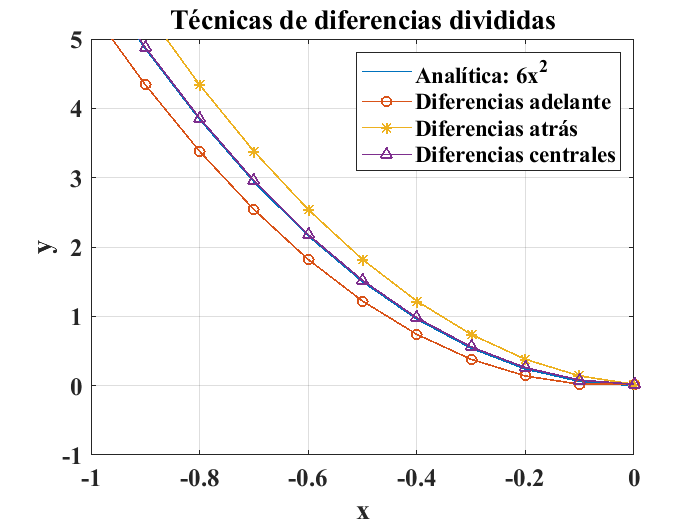

In [12]:
clear 
close all
clc

% Programa para el cálculo de la derivada de y=2x^3 en 10 puntos 
incremento=0.1;
x=-2:incremento:2;
y=2*x.^3;
derivada=6*x.^2; % derivada analítica

dif_finitas=diff(y)./diff(x); % Diferencias divididas finitas
dif_adelante=dif_finitas;
dif_adelante(length(x))=NaN; % Se ajusta el tamaño del arreglo para 
%establecer compatibilidad de manera que al establecer el último elemento
% se indica que serán diferencias hacia adelante

dif_atras=[NaN,dif_finitas]; % Se ajusta el tamaño del arreglo para 
%establecer compatibilidad de manera que al establecer el primer elemento
% se indica que serán diferencias hacia atrás

dif_centrales=gradient(y,x,incremento); % Diferencias divididas finitas centrales

figure
plot(x,derivada,"LineWidth",1)
hold on
plot(x,dif_adelante,"o-","LineWidth",1)
plot(x,dif_atras,"*-","LineWidth",1)
plot(x,dif_centrales,"^-","LineWidth",1)
title("Técnicas de diferencias divididas")
xlabel("x")
ylabel("y")
axis([-1,0,-1,5])
grid
legend("Analítica: 6x^2","Diferencias adelante","Diferencias atrás","Diferencias centrales")
set(gca,'fontsize',15);
set(gca,'fontname','Times New Roman','FontWeight','Bold');



## Integración numérica

En ingeniería y en otras áreas de la ciencia, una integral se interptreta de manera frecuente como el área bajo una curva, esta área se puede calcular si se divide en rectángulos pequeños al espacio que cubre dicha curva, de manera que se puede aproximar el cálculo de un área irregular en términos de la suma del área independiente de los rectángulos pequeños antes mencionados, usando la fómula básica $área=base\times altura$ ({cite:t}`Moore2013`, {cite:t}`chapra2006metodos`).

$$
A=\sum^2_1\frac{(x_{i+1}-x_i)(y_{i+1}+y_i)}{2}
$$

Gráficamente se tiene:



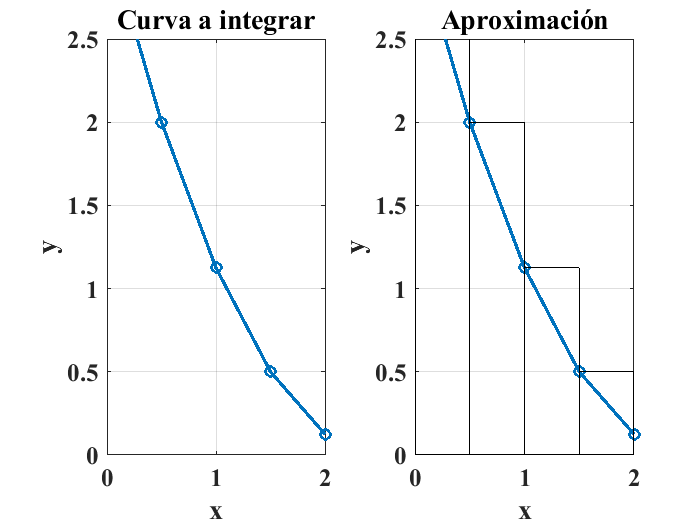

In [13]:
clear 
clc
close all 

x=[0:0.5:4];
y=0.5*(x-2.5).^2;


figure
subplot(1,2,1)
plot(x,y,'o-','LineWidth',2)
title("Curva a integrar")
axis([0,2,0,2.5])
xlabel("x")
ylabel("y")
grid
set(gca,'fontsize',15);
set(gca,'fontname','Times New Roman','FontWeight','Bold');


subplot(1,2,2)
plot(x,y,'o-','LineWidth',2)
hold on 
b=bar(x,y,'histc');
b.FaceColor='none';
axis([0,2,0,2.5])
title("Aproximación")
xlabel("x")
ylabel("y")
grid
set(gca,'fontsize',15);
set(gca,'fontname','Times New Roman','FontWeight','Bold');



Como puede observarse, el área aproximada se puede calcular usando los comandos anteriormete analizados para el cálculo de las diferencias divididas finitas, usando las siguientes instrucciones ({cite:t}`Moore2013`):


In [14]:
clear 
clc
close all 

x=[0:0.5:4]; %creación del vector de la variable independiente
y=0.5*(x-2.5).^2; % función a integrar en el intervalo [0,4]

promedio_y=y(1:8)+diff(y)./2; %Aproximación trapezoidal
Area=sum(diff(x).*promedio_y)%Cálculo del área bajo la curva

Area = 3.2500

La función nativa de MATLAB® que permite hacer el cálculo de dicha integral es `trapz()`, que se refiere al método trapezoidal para calcular el área bajo la curva:  

In [15]:
clear 
clc
close all 

x=[0:0.5:4];
y=0.5*(x-2.5).^2;
trapz(x,y)

ans = 3.2500

Aproximaremos el área bajo la curva formada por una función de prueba, aun cuando esta no haya sido producto de mediciones experimentales, con fines de calibración y mejor entendimiento del método numérico. A continuación calcularemos la integral de la función:

$$
f(x)=y=0.5x^2
$$

En el intervalo $0\leq x \leq 1$. La integral se calcula con MATLAB® usando las instrucciones:

In [16]:
clear
close all
clc

x=[0:0.1:1];
y=0.5*x.^2;
trapz(x,y)

ans = 0.1675

Este ultimo resultado corresponde a una aproximación numérica del resultado del cálculo de la integral:

$$
\int^1_0 0.5x^2 dx
$$

La solución exacta de esta integral es:

$$
\int^1_0 0.5x^2 dx=0.5\int^1_0 5x^2 dx=0.5\frac{x^3}{3}| ^{1}_{0}=0.5 \left ( \frac{1^3}{3}-\frac{0^3}{3} \right )=0.1667
$$


In [17]:
0.5/3

ans = 0.1667

Gráficamente, este resultado equivale al área bajo la curva de la función $y=0.5x^2$ como se muestra en la siguiente figura:

Area = 0.1675

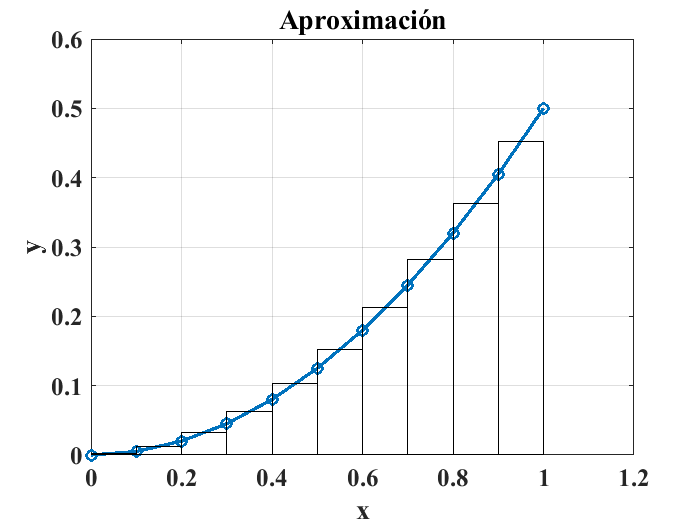

In [18]:
clear
close all
clc

x=[0:0.1:1];
y=0.5*x.^2;

promedio_y=y(1:10)+diff(y)./2; %Aproximación trapezoidal
Area=sum(diff(x).*promedio_y)%Cálculo del área bajo la curva
figure
plot(x,y,'o-','LineWidth',2)
hold on 
b=bar(x(1:10),promedio_y,'histc');
b.FaceColor='none';
axis([0,1.2,0,0.6])
title("Aproximación")
xlabel("x")
ylabel("y")
grid
set(gca,'fontsize',15);
set(gca,'fontname','Times New Roman','FontWeight','Bold');

Las funciones `quad('f(x)',x_0,x_1)` y `quadl('f(x)',x_0,x_1)` permiten calcular la integral de una fucnión sin la necesidad de especificar de forma manual los rectángulos o el incremento para los datos usados para el cálculo del área bajo la curva. Las siguientes instrucciones ejemplifican lo antes expuesto:

In [19]:
clear
close all
clc

quad('0.5*x.^2',0,1)

ans = 0.1667

La función `quadl('f(x)',x_0,x_1)` usa una cuadratura adaptativa conocida como cuadratura de Lobatto ({cite:t}`Moore2013`).

In [20]:
clear
close all
clc

quadl('0.5*x.^2',0,1)

ans = 0.1667

En las funciones anteriores, usadas para calcular una integral definida, se proporciona la estructura de la función en forma de una cadena de caracteres, dado que se proporciona entrecomillada la función a integrar. 

Una forma alternativa para generar gráficas de funciones es usar la sintaxis para la creación de las denominadas funciones anónimas y la función `fplot(función,[x_nin,x_max])` las siguientes líneas de código generan la gráfica de la función

$$
y=f(x)=-3.5x^3+12x^2-50
$$

En el intervalo $-15\leq x \leq 15$

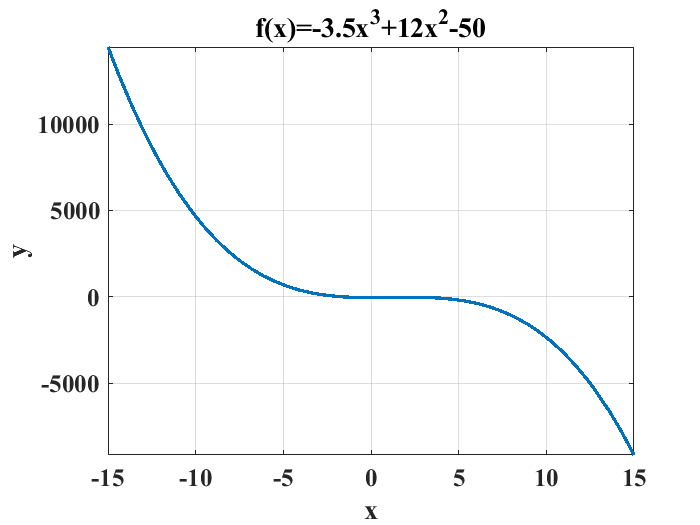

In [21]:
clear
close all
clc

%Ejemplo de código para la creación de funciones anónimas en MATLAB
%x=-30:0.01:30;

f_x= @ (x) -3.5*x.^3+12*x.^2-50; %Sintaxis de la función interna al código 
%o tambien conocida como función anónima

fplot(f_x,[-15,15],"LineWidth",2)%Comado para graficar funciones anónimas

title("f(x)=-3.5x^3+12x^2-50")
xlabel("x")
ylabel("y")
grid
set(gca,'fontsize',15);
set(gca,'fontname','Times New Roman','FontWeight','Bold');


Es posible calcular la integral definida en un intervalo, haciendo una combinación de los comandos `quadl('f(x)',x_0,x_1)` y `quad('f(x)',x_0,x_1)` con la sintaxis para la especificación de funciones anónimas:

In [22]:
clear
close all
clc

%Cálculo de una integral definida usando una combinación 
%de quad y función anónima


f_x= @ (x) -3.5*x.^3+12*x.^2-50; %Sintaxis de la función interna al código 
%o tambien conocida como función anónima

quad(f_x,-3,3)% Se invoca a la función anónima y se cacula la integral definida


ans = -84

El paquete de cálculo simbólico también permite la evaluación de integrales indefinidas o definidas especificando expresiones, cuando se usa la función `int(expresión,[x_0,x_1])`.

In [23]:
clear
close all
clc

syms x

fx = 0.5*x^2;%Creación de la función o expresión a integrar
disp("integral indefinida de la función f(x)=0.5x^2")
I = int(fx) %sintaxis para calcular la integral indefinida
disp("integral definida de la función f(x)=0.5x^2 en el intervalo [-1,1]")
I_def = int(fx,[-1 1]) %sintaxis para calcular la integral indefinida


integral indefinida de la función f(x)=0.5x^2


integral definida de la función f(x)=0.5x^2 en el intervalo [-1,1]


## Ejercicio de la práctica 12

1. Considere la función:

$$
y=2x^4-5x^3+2x^2-2.5x+40
$$

Construya un vector $x$ con el intervalo $[-2.5,2.5]$ y uselo con la función $y$ para aproximar la derivada de $y$ respecto de $x$, use el método de diferencias divididas finitas hacia adelante y compare los resultados con los obtenidos de manera analítica:

$$
\frac{dy}{dx}=8x^3-15x^2+4x-2.5
$$

Construya una tabla para reportar la comparación y el porcentaje de error.

2. Repita el ejercicio anterior para las funciones $y=3cos(4x)$ y $y=3.5e^{2x}$, aplicando el método de las diferencias divididas centrales.


3. Considere el polinomio:

$$
y=3x^3-15x^2+2.5x+10
$$

a)  Use la función `trapz()` para estimar la integral de y respecto de x en el intervalo $[-2,2]$. Use 11 valores de $x$ para calcular los valores correspondientes de $y$ como entrada a la función `trapz()`.
b)  Use las funciones `quad()` y `quadl()` para encontrar la integral de y respecto de $x$ en el intervalo $[-2,2]$.
c)  Use el paquete de cálculo simbólico para calcular la integral:

$$
\int^{b}_{a} 3x^3-15x^2+2.5x+10
$$

4. Repita el ejercicio anterior para la función:

$$
y=4.5cos(15x)e^{-3x}
$$

En el intervalo $[0,3]$.